# Import needed packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams.update({'figure.dpi': 120,'figure.figsize': (6,4)})                    

from pyQME.spectral_density import SpectralDensity
from pyQME.tensors import RedfieldTensorReal
from pyQME.utils import overdamped_brownian,underdamped_brownian,get_timeaxis,wn2ips

# Define the system

**Hamiltonian (1/cm)**

In [2]:
nchrom = 2 #number of chromophores

coupling = 20
E0 = 10000
energy_gap = 100
H = np.zeros((nchrom,nchrom)) #hamiltonian

H[0] = np.asarray([E0      ,coupling     ])
H[1] = np.asarray([coupling,E0+energy_gap])

In [3]:
H

array([[10000.,    20.],
       [   20., 10100.]])

**Temperature (Kelvin)**

In [4]:
temp = 298

**Spectral density**

In [5]:
freq_axis_SD = np.arange(0.1,4000,0.1)

In [6]:
SD_data = overdamped_brownian(freq_axis_SD,30,37)
SD_data = SD_data + underdamped_brownian(freq_axis_SD,5,50,1000)

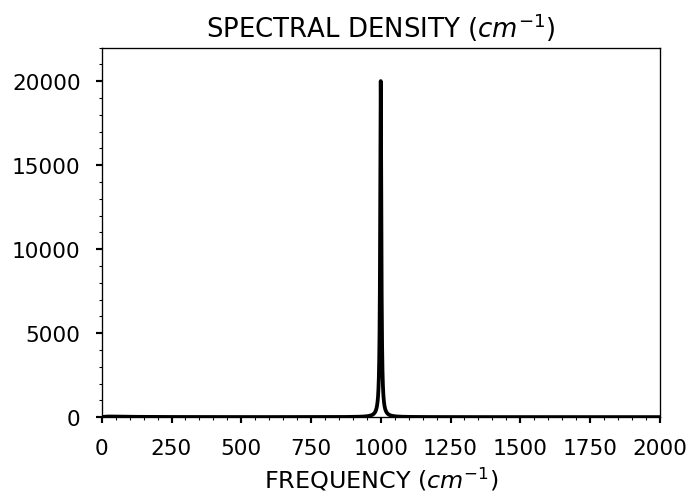

In [7]:
plt.plot(freq_axis_SD,SD_data,color='black');
plt.xlim(0,2000);
plt.ylim(0,22000)
plt.title('SPECTRAL DENSITY ($cm^{-1}$)');
plt.xlabel('FREQUENCY ($cm^{-1}$)');
plt.minorticks_on()

In [8]:
SD_obj = SpectralDensity(freq_axis_SD,SD_data,temperature=temp)

**Time axis (cm)**

In [9]:
energies = np.diag(H)
time_axis = get_timeaxis(SD_obj.Reorg,energies,5)
SD_obj.time = time_axis

**Relaxation Tensor**

In [10]:
rel_tens_obj = RedfieldTensorReal(H,SD_obj)

# Excited state dynamics

**Time axis**

In [11]:
time_axis_ps = np.arange(0,3,0.001)     #to be saved
time_axis_cm = time_axis_ps*wn2ips

**Initial density matrix**

In [12]:
#site basis
rho_0 = np.zeros([nchrom,nchrom])
rho_0[1,1] = 1.
rho_0[0,1] = rho_0[0,1]

**Propagate**

In [13]:
rho_t_site = rel_tens_obj.propagate(rho_0,time_axis_cm,basis='site')     #to be saved

#convert to exciton basis
rho_t_exc = rel_tens_obj.transform(rho_t_site)     #to be saved

# Check the results

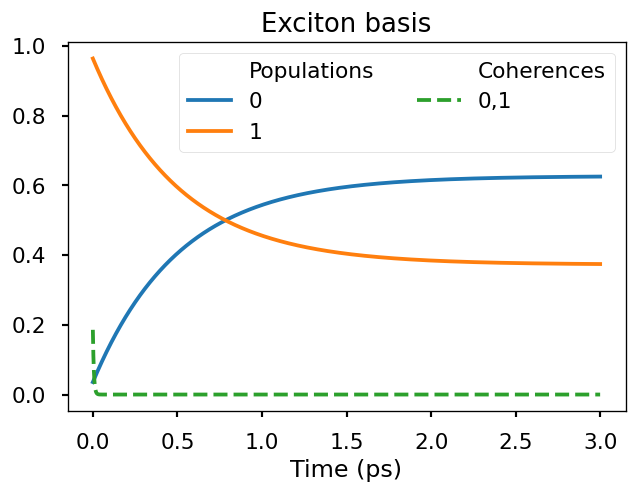

In [14]:
plt.title('Exciton basis')
plt.plot([],[],color='white',label='Populations')
plt.plot(time_axis_ps,rho_t_exc[:,0,0].real,label = '0')
plt.plot(time_axis_ps,rho_t_exc[:,1,1].real,label = '1')
plt.plot([],[],color='white',label='Coherences')
plt.plot(time_axis_ps,rho_t_exc[:,0,1].real,label = '0,1',ls='--')
plt.legend(ncol=2,fontsize = 13)
plt.xlabel('Time (ps)');

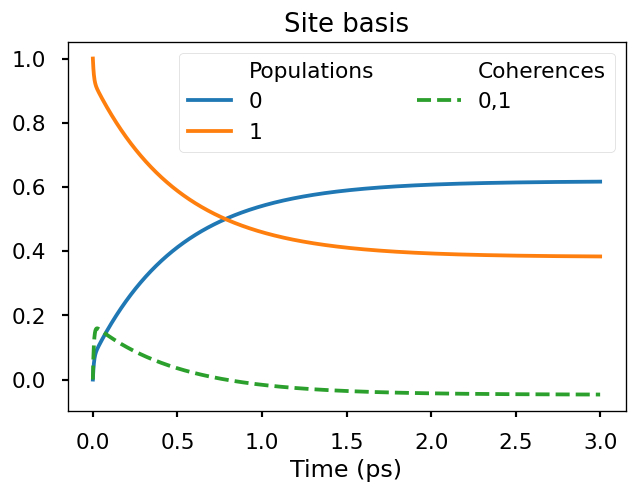

In [15]:
plt.title('Site basis')
plt.plot([],[],color='white',label='Populations')
plt.plot(time_axis_ps,rho_t_site[:,0,0].real,label = '0')
plt.plot(time_axis_ps,rho_t_site[:,1,1].real,label = '1')
plt.plot([],[],color='white',label='Coherences')
plt.plot(time_axis_ps,rho_t_site[:,0,1].real,label = '0,1',ls='--')
plt.legend(ncol=2,fontsize = 13)
plt.xlabel('Time (ps)');